# Develop and Interpret a K-Means Clustering

## Step 1: Load Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel("https://ucarecdn.com/09f64f6f-9008-424c-bf41-049d85f3012e/rfmclvanalysis.xlsx", header=[0,1], index_col=[0])
df

Revenue InvoiceDate               RecencyScore  \
                 mean   frequency recency Unnamed: 4_level_1   
CustomerID                                                     
12347       23.681319           6     365                  5   
12349       20.243750           0       0                  1   
12363       24.000000           1     132                  3   
12370       20.636687           3     309                  5   
12381       17.985488           2     115                  3   
...               ...         ...     ...                ...   
18265       17.424130           1      85                  2   
18270       25.740909           1     228                  4   
18278       19.322222           0       0                  1   
18280       18.060000           0       0                  1   
18287       26.246857           2     158                  3   

               FrequencyScore      MonetaryScore           RfmScore   CLV_3M  \
           Unnamed: 5_level_1 Unnamed: 6_level_1 Unnamed: 7_level_1    Q4_10   
CustomerID                                                                     
12347                       5                  4                554   711.79   
12349                       1                  4                114     0.00   
12363                       2                  4                324     0.00   
12370                       3                  4                534  1748.02   
12381                       3                  3                333     0.00   
...                       ...                ...                ...      ...   
18265                       2                  3                223     0.00   
18270                       2                  4                424     0.00   
18278                       1                  3                113     0.00   
18280                       1                  3                113     0.00   
18287                       3                  4                334     0.00   

                                               
             Q1_11    Q2_11    Q3_11    Q4_11  
CustomerID                                     
12347       475.39  1018.77   584.91  1519.14  
12349         0.00     0.00     0.00  1457.55  
12363         0.00   299.10   252.90     0.00  
12370       938.39     0.00     0.00   739.28  
12381         0.00     0.00  1028.74   446.07  
...            ...      ...      ...      ...  
18265         0.00     0.00   801.51     0.00  
18270       111.95     0.00     0.00   171.20  
18278         0.00     0.00   173.90     0.00  
18280       180.60     0.00     0.00     0.00  
18287         0.00   765.28     0.00  1072.00  

[1000 rows x 12 columns]

In [2]:
# Select first three columns
rfm_df = df.iloc[:,:3]
# Drop multilevel header
rfm_df = rfm_df.droplevel(0, axis = 1)
# Rename column
rfm_df = rfm_df.rename(columns={"mean": "monetary"})
rfm_df

,monetary,frequency,recency
CustomerID,,,
12347,23.681319,6,365
12349,20.243750,0,0
12363,24.000000,1,132
12370,20.636687,3,309
12381,17.985488,2,115
...,...,...,...
18265,17.424130,1,85
18270,25.740909,1,228
18278,19.322222,0,0


## Step 2: Subset Consumer Data

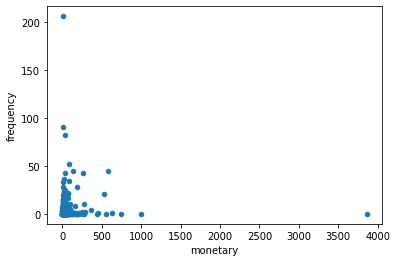

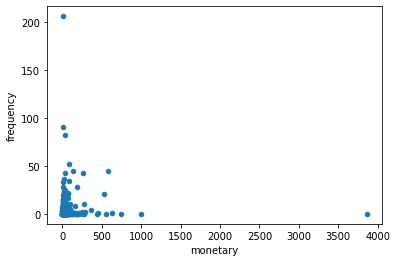

In [3]:
(rfm_df.plot
 .scatter(x = "monetary", y = "frequency")
 .get_figure())

In [4]:
segments_df = pd.read_csv("https://ucarecdn.com/f3fd2501-7e22-4e73-b143-27bf0dd690c0/customerid_segments.csv", index_col = 0)
segments_df

,segment
CustomerID,
12347,Consumer
12349,Consumer
12363,Consumer
12370,Consumer
12381,Consumer
...,...
18265,Consumer
18270,Consumer
18278,Consumer


In [5]:
rfm_df = pd.merge(rfm_df, segments_df, left_index = True, right_index = True, how = "left")
rfm_df.head()


,monetary,frequency,recency,segment
CustomerID,,,,
12347,23.681319,6,365,Consumer
12349,20.243750,0,0,Consumer
12363,24.000000,1,132,Consumer
12370,20.636687,3,309,Consumer
12381,17.985488,2,115,Consumer


In [6]:
rfm_df = rfm_df.loc[rfm_df['segment'] == "Consumer"]
rfm_df = rfm_df.drop("segment", axis = 1)
rfm_df

,monetary,frequency,recency
CustomerID,,,
12347,23.681319,6,365
12349,20.243750,0,0
12363,24.000000,1,132
12370,20.636687,3,309
12381,17.985488,2,115
...,...,...,...
18265,17.424130,1,85
18270,25.740909,1,228
18278,19.322222,0,0


<AxesSubplot:xlabel='monetary', ylabel='frequency'>

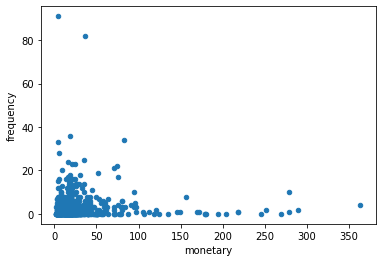

In [7]:
(rfm_df.plot
 .scatter(x = "monetary", y = "frequency"))

## Step 3: Scale Data

In [8]:
rfm_df.sort_values(["recency", "frequency", "monetary"], ascending = False)

,monetary,frequency,recency
CustomerID,,,
14606,4.451854,91,372
13468,18.890629,36,371
17581,25.102364,23,371
14135,35.002313,14,371
12583,28.902500,14,370
...,...,...,...
15276,2.602115,0,0
17297,2.583922,0,0
17832,2.547049,0,0


In [9]:
ranked_df = rfm_df.rank(method='first').sort_values('recency')
ranked_df

,monetary,frequency,recency
CustomerID,,,
12349,646.0,1.0,1.0
12390,408.0,2.0,2.0
12448,480.0,3.0,3.0
12512,43.0,349.0,4.0
12513,413.0,4.0,5.0
...,...,...,...
12583,827.0,950.0,980.0
13468,560.0,982.0,981.0
14135,864.0,952.0,982.0


## Step 4: Reverse the Rank Order

In [10]:
ranked_df = abs(ranked_df-(len(ranked_df)+1)).astype(int)
ranked_df.sort_values("recency")

,monetary,frequency,recency
CustomerID,,,
14606,933,1,1
17581,215,9,2
14135,121,33,3
13468,425,3,4
12583,158,35,5
...,...,...,...
12513,572,981,980
12512,942,636,981
12448,505,982,982


## Step 5: Run the K-Means Clustering

<AxesSubplot:xlabel='monetary', ylabel='frequency'>

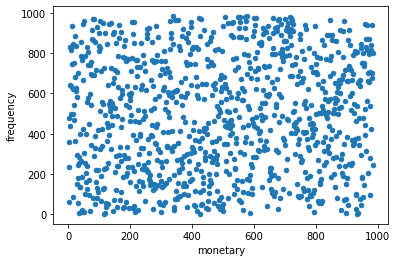

In [11]:
(ranked_df.plot
 .scatter(x = "monetary", y = "frequency"))

In [12]:
from sklearn.cluster import KMeans
k = 5
fitted = KMeans(n_clusters=k).fit(ranked_df)

## Step 6: Inspect Clustering Results

In [13]:
fitted.labels_[:10]

array([2, 4, 2, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [14]:
fitted.cluster_centers_

array([[760.61111111, 307.76495726, 294.58974359],
       [266.76616915, 164.37313433, 179.1840796 ],
       [228.04081633, 818.31972789, 817.80272109],
       [310.39361702, 485.47340426, 478.70212766],
       [752.9953271 , 785.05607477, 791.85514019]])

## Step 7: Silhoutte Value

In [15]:
from sklearn.metrics import silhouette_score

for k in range(2,10):
  fitted = KMeans(n_clusters=k).fit(ranked_df)
  score = silhouette_score(ranked_df, fitted.labels_)
  print('Silhouette value for k = %i %0.4f' % (k, score))

Silhouette value for k = 2 0.4067
Silhouette value for k = 3 0.3674
Silhouette value for k = 4 0.3684
Silhouette value for k = 5 0.3672
Silhouette value for k = 6 0.3458
Silhouette value for k = 7 0.3338
Silhouette value for k = 8 0.3177
Silhouette value for k = 9 0.3349


## Step 8: Interpret the Results

In [16]:
k = 4
fitted = KMeans(n_clusters=k).fit(ranked_df)

In [17]:
ranked_df['Cluster'] = fitted.labels_.astype(str)

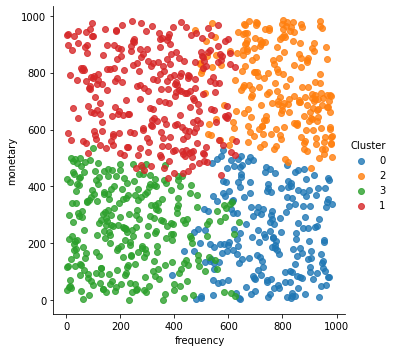

In [18]:
import seaborn as sns
(sns
 .lmplot(x='frequency', y='monetary', data=ranked_df, hue='Cluster', fit_reg=False))

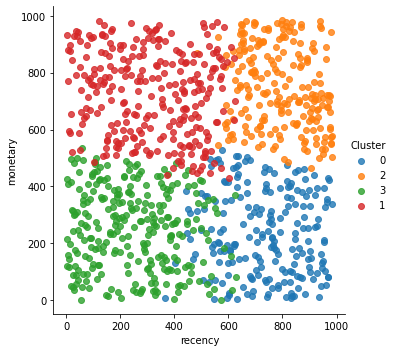

In [19]:
(sns
 .lmplot(x='recency', y='monetary', data=ranked_df, hue='Cluster', fit_reg=False))

<AxesSubplot:xlabel='Cluster', ylabel='monetary'>

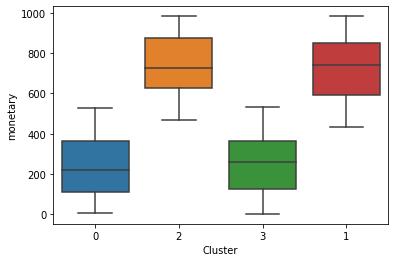

In [20]:
sns.boxplot(x="Cluster", y="monetary", data=ranked_df)

<AxesSubplot:xlabel='Cluster', ylabel='frequency'>

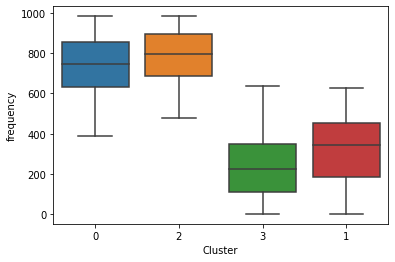

In [21]:
sns.boxplot(x="Cluster", y="frequency", data=ranked_df)

<AxesSubplot:xlabel='Cluster', ylabel='recency'>

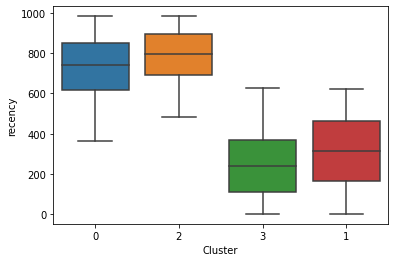

In [22]:
sns.boxplot(x="Cluster", y="recency", data=ranked_df)

## Step 9: Select the Top Segment

In [25]:
high_ranks_cluster = "3"

In [26]:
high_value_customers = ranked_df[ranked_df['Cluster'] == high_ranks_cluster].index
high_value_customers

Int64Index([15332, 17523, 15621, 17955, 15814, 17317, 15215, 17656, 13685,
            15107,
            ...
            14189, 16353, 15640, 12971, 14060, 17412, 12583, 13468, 14135,
            17581],
           dtype='int64', name='CustomerID', length=275)

## Step 10: Investigate High-Profile Customers

In [27]:
import pandas as pd
df = pd.read_csv("https://ucarecdn.com/8d8cd2ee-47d4-474f-b3a7-66eb9a20b43e/retail_data_clean.csv")

In [28]:
high_value_customers_top_items = (df[df['CustomerID']
                                  .isin(high_value_customers)]
                                  .groupby("StockCode")
                                  .agg({"Revenue": "sum",
                                        "Quantity": "sum"})
                                  .sort_values("Revenue", ascending = False)
                                  .head(10)
                                  .reset_index()
                                  )

high_value_customers_top_items

,StockCode,Revenue,Quantity
0,22423,13677.25,1193
1,85123A,8542.15,3169
2,79321,7578.20,1556
3,84997D,6999.58,1882
4,85099B,6813.54,3507
5,84879,6527.16,4044
6,23084,5603.48,3070
7,84997C,5450.50,1462
8,47566,5411.85,1157
9,22086,4416.90,1622


In [29]:
stock_codes_df = pd.read_csv("https://ucarecdn.com/5cef20a8-c7d8-46e1-af8a-830388dc89c9/stock_codes.csv")

In [30]:
high_value_customers_top_items = pd.merge(high_value_customers_top_items, stock_codes_df, "left")
high_value_customers_top_items

,StockCode,Revenue,Quantity,Description
0,22423,13677.25,1193,REGENCY CAKESTAND 3 TIER
1,85123A,8542.15,3169,WHITE HANGING HEART T-LIGHT HOLDER OR CREAM HA...
2,79321,7578.20,1556,CHILLI LIGHTS
3,84997D,6999.58,1882,PINK 3 PIECE POLKADOT CUTLERY SET OR CHILDRENS...
4,85099B,6813.54,3507,JUMBO BAG RED RETROSPOT
5,84879,6527.16,4044,ASSORTED COLOUR BIRD ORNAMENT
6,23084,5603.48,3070,RABBIT NIGHT LIGHT
7,84997C,5450.50,1462,BLUE 3 PIECE POLKADOT CUTLERY SET OR CHILDRENS...
8,47566,5411.85,1157,PARTY BUNTING
9,22086,4416.90,1622,PAPER CHAIN KIT 50'S CHRISTMAS


## Step 11: Export the Results

In [31]:
high_value_customers_top_items.to_csv("high_value_customers_top_items.csv", index = False)